In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [13]:
pd.set_option('display.width', 1000)
# pd.option_context('display.max_colwidth', -1)

In [4]:
df = pd.read_csv("../datasets/Raisin_Dataset.csv")
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [5]:
#2 classes

df["Class"].unique()

array(['Kecimen', 'Besni'], dtype=object)

In [15]:
dfs = [x for _,x in df.groupby('Class')]
df0=dfs[1].reset_index(drop=True)
df1=dfs[0].drop(columns=['Class']).reset_index(drop=True)

In [16]:
df0.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [17]:
df1.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
0,137583,649.541485,273.260282,0.907201,142650,0.731638,1590.354
1,117592,533.292856,288.558319,0.840966,123587,0.730068,1432.006
2,95546,487.178282,251.960243,0.855875,99166,0.722782,1276.807
3,96582,446.705203,278.325498,0.782172,100113,0.706598,1216.979
4,61409,403.701295,209.365889,0.855007,67286,0.597393,1083.477


In [18]:
df0['Class']=0
df1['Class']=1

In [19]:
df1.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,137583,649.541485,273.260282,0.907201,142650,0.731638,1590.354,1
1,117592,533.292856,288.558319,0.840966,123587,0.730068,1432.006,1
2,95546,487.178282,251.960243,0.855875,99166,0.722782,1276.807,1
3,96582,446.705203,278.325498,0.782172,100113,0.706598,1216.979,1
4,61409,403.701295,209.365889,0.855007,67286,0.597393,1083.477,1


In [20]:
train_df0= df0.iloc[0:int(len(df0)*.8)]
train_df1=df1.iloc[0:int(len(df1)*.8)]

In [31]:
test_df0=df0.iloc[int(len(df0)*.8):]
test_df1=df1.iloc[int(len(df1)*.8):]

In [27]:
train_df0.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,0
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,0
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,0
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,0
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,0


In [23]:
train_df1.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,137583,649.541485,273.260282,0.907201,142650,0.731638,1590.354,1
1,117592,533.292856,288.558319,0.840966,123587,0.730068,1432.006,1
2,95546,487.178282,251.960243,0.855875,99166,0.722782,1276.807,1
3,96582,446.705203,278.325498,0.782172,100113,0.706598,1216.979,1
4,61409,403.701295,209.365889,0.855007,67286,0.597393,1083.477,1


In [28]:
X_train_data = pd.concat([
    train_df0.drop(['Class'], axis=1),
    train_df1.drop(['Class'], axis=1)
]).reset_index(drop=True)

X_train_data.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251


In [29]:
X_train_data.shape

(720, 7)

In [30]:
y_train = pd.concat([
    train_df0['Class'],
    train_df1['Class']
]).to_numpy()

y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [32]:
X_test_data = pd.concat([
    test_df0.drop(['Class'], axis=1),
    test_df1.drop(['Class'], axis=1)
]).reset_index(drop=True)
y_test=pd.concat([
    test_df0['Class'],
    test_df1['Class']
]).to_numpy()

In [33]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [34]:
X_train_standard = X_train_data.copy()
X_train_standard= X_train_standard.to_numpy()

In [35]:
#bias term
X_train = np.hstack([
    np.ones((X_train_standard.shape[0], 1)),
    X_train_standard
])
X_train.shape

(720, 8)

In [36]:
X_test_standard = X_test_data.copy()

In [37]:
X_test_standard= X_test_standard.to_numpy()
X_test_standard.shape

(180, 7)

In [40]:
#Add bias term
X_test = np.hstack([
    np.ones((X_test_standard.shape[0],1)),
    X_test_standard
])
X_test.shape


(180, 8)

In [41]:
X_test

array([[1.00000000e+00, 4.88090000e+04, 3.32264893e+02, ...,
        5.18470000e+04, 6.61341680e-01, 9.28016000e+02],
       [1.00000000e+00, 4.90390000e+04, 2.85402087e+02, ...,
        5.08790000e+04, 7.14770872e-01, 8.41666000e+02],
       [1.00000000e+00, 6.46690000e+04, 3.64582804e+02, ...,
        6.75240000e+04, 6.55845605e-01, 9.95692000e+02],
       ...,
       [1.00000000e+00, 9.96570000e+04, 4.31706981e+02, ...,
        1.06264000e+05, 7.41098519e-01, 1.29282800e+03],
       [1.00000000e+00, 9.35230000e+04, 4.76344094e+02, ...,
        9.76530000e+04, 6.58798253e-01, 1.25854800e+03],
       [1.00000000e+00, 8.56090000e+04, 5.12081774e+02, ...,
        8.91970000e+04, 6.32019963e-01, 1.27286200e+03]], shape=(180, 8))

#Sigmoid function 
sigmoid(x) = 1/(1 + exp(-x))

In [58]:
def sigmoid(x):
    return 1/ (1 + np.exp(-x)) if x >0 else (np.exp(x)/(1+np.exp(x)))

#cost function

cost = -y * log(y_hat) - (1-y) * log(1-y_hat)

In [56]:
def cost(y_actual, y_hat):
    epsilon = 1e-15
    #Avoid log(0) situation
    y_hat_clipped = np.clip(y_hat,epsilon,1-epsilon)
    # loss = - y_actual * np.log(y_hat) - (1-y_actual)* np.log(1-y_hat)
    loss = - y_actual * np.log(y_hat_clipped) - (1-y_actual)* np.log(1-y_hat_clipped)
    return loss

#Gradient

gradient(w) = (y_hat - y) . X

In [64]:
def compute_gradient(X, y, y_proba):
    '''
    X: Input features Array of N x D shape
    y: ground truth output of N Shape
    y_proba: probability of N shape
    :param X: 
    :param y: 
    :param y_prob: 
    :return: 
    '''
    assert y.ndim == 1
    # print(f"X.shape: {X.shape}, {y=}, {y_proba=}")
    grad=np.dot((y_proba - y), X)
    # print(f"{grad=}")
    return grad

Probability Prediction

y_hat = sigmoid(w . x)

In [45]:
def probability(w,X):
    y_proba = np.array([])
    
    for i in range(len(X)):
        proba = sigmoid(np.dot(w,X[i]))
        y_proba = np.append(y_proba,proba)
    return y_proba

#Label Prediction

probability = sigmoid (w . x)

if probability > .5 => class 1 else class 0

In [47]:
def label_prediction(y_proba):
    y_pred = np.array([])
    
    for i in range(len(y_proba)):
        pred=0
        if y_proba[i] > 0.5:
            pred = 1
        y_pred=np.append(y_pred,pred)
    return y_pred

w = w - lr * gradient(w)

In [70]:
#Batch Gradient Descent
def fit(X, y, epochs=10, l_rate=.01):
    N = X.shape[0]
    w=np.ones((1,X_train.shape[1]))
    cost_list=[]
    
    for k in range(epochs):
        y_proba = probability(w,X)
        w= w - l_rate * compute_gradient(X, y, y_proba) #update weights
        
        loss=0
        total_cost=0
        for i in range(N):
            loss += cost(y[i], y_proba[i])
        total_cost = loss/N
        cost_list.append(total_cost)
    return w, cost_list
        

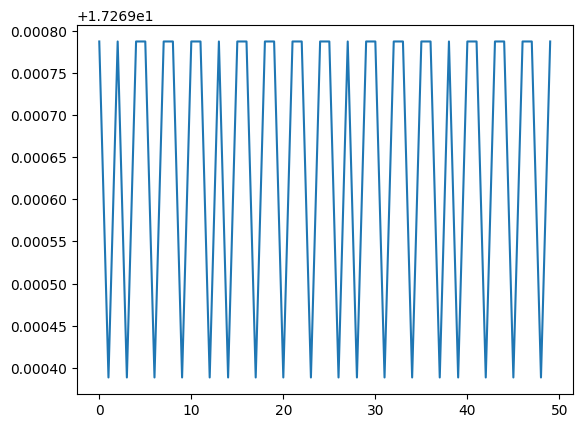

In [69]:
epochs = 50
l_rate=.0001

w_offline, cost_list_offline = fit(X_train, y_train, epochs=epochs, l_rate=l_rate)
# print(f"{w_offline=}, {cost_list_offline=}")
plt.plot(cost_list_offline)
plt.show();

As seen from above, the cost function is fluctuating,

solution : standardize 

Use Mini-Batch Gradient

In [72]:
def create_mini_batches(X, y, batch_size):
    """
    Creates mini-batches for Mini-Batch Gradient Descent.
    
    Args:
        X (np.ndarray): The feature matrix.
        y (np.ndarray): The target vector (should be column vector or convertible).
        batch_size (int): The desired size of each batch.
        
    Returns:
        list: A list of tuples, where each tuple contains (X_mini, Y_mini).
    """
    mini_batches = []

    # Ensure y is a column vector for proper hstacking if it's 1D
    if y.ndim == 1:
        y_stacked = y.reshape(-1, 1)
    else:
        y_stacked = y

    # 1. Combine Data and Shuffle
    data = np.hstack((X, y_stacked))
    np.random.shuffle(data)

    N = data.shape[0]

    # 2. Slice the Data using iteration
    # The range function automatically handles the start, stop, and step (batch_size)
    for i in range(0, N, batch_size):
        # Slice the combined data for the current batch
        mini_batch = data[i : i + batch_size, :]

        # 3. Split the mini-batch back into features (X) and target (Y)
        X_mini = mini_batch[:, :-1]
        Y_mini = mini_batch[:, -1].reshape((-1, 1)) # Ensure Y is a column vector

        mini_batches.append((X_mini, Y_mini))

    return mini_batches

In [76]:
def fit_mini(X, y, batch_size = 10, epochs=10, learning_rate=0.01):
    N,d = X.shape
    w = np.ones((1,d))
    cost_list = []
    for k in range(epochs):
        mini_batches = create_mini_batches(X, y.reshape(len(y),1), batch_size)
        for X_mini, y_mini in mini_batches:
            y_proba = probability(w, X_mini)
            w -=learning_rate* compute_gradient(X_mini, np.squeeze(y_mini), y_proba)
            total_cost = np.mean([
                cost(y_mini[i], y_proba[i]) for i in range(len(y_mini))
            ])
            cost_list.append(total_cost)
            
    return w, cost_list

Weights: [[-2.04600000e+00 -9.18228000e+02 -4.53656148e+02 -5.04050122e+02
  -9.11957594e-01  4.41154000e+02 -1.22759347e+00 -1.56283825e+03]]


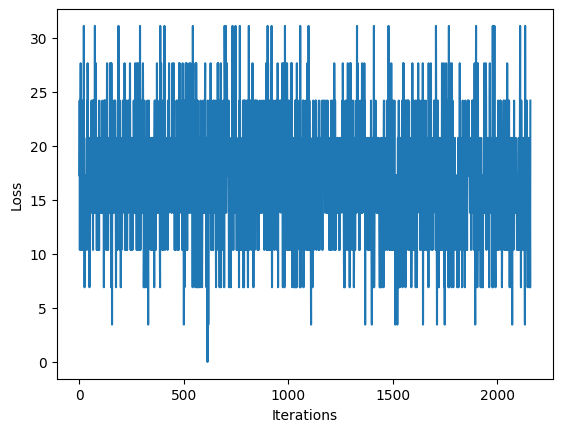

In [89]:
epochs = 30
learning_rate = 0.001
w_mini, cost_list_mini = fit_mini(X_train, y_train, epochs = epochs, learning_rate = learning_rate)
print(f"Weights: {w_mini}")
plt.plot(cost_list_mini)
plt.xlabel("Iterations")
plt.ylabel("Loss");

mini-batches cause noise in gradient updates. That’s normal, but you can smooth it by plotting the average loss per epoch instead of per mini-batch



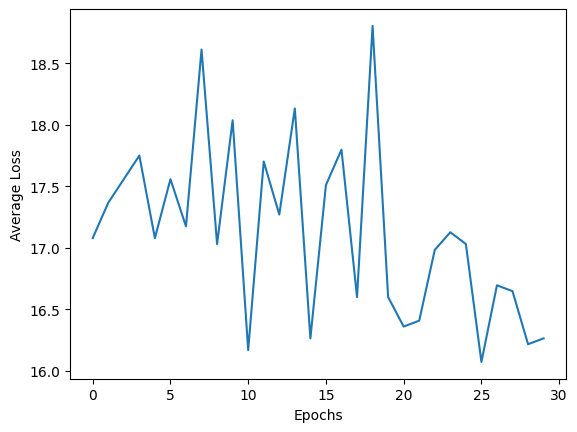

In [90]:
avg_costs = [np.mean(cost_list_mini[i:i+len(X_train)//10]) for i in range(0, len(cost_list_mini), len(X_train)//10)]
plt.plot(avg_costs)
plt.xlabel("Epochs")
plt.ylabel("Average Loss");


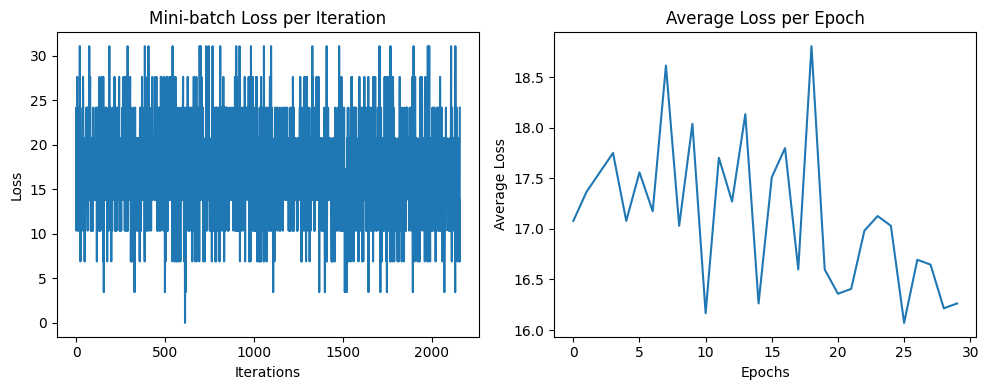

In [91]:
#Above Plots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

ax1.plot(cost_list_mini)
ax1.set_xlabel("Iterations")
ax1.set_ylabel("Loss")
ax1.set_title("Mini-batch Loss per Iteration")

ax2.plot(avg_costs)
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Average Loss")
ax2.set_title("Average Loss per Epoch")

plt.tight_layout()
plt.show()
